In [9]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv("data/healthcare-dataset-stroke-data.csv")

# Первичный обзор данных
print("Размеры датасета:", data.shape)
data.head()

Размеры датасета: (5110, 12)


id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

Конструирование признаков

In [10]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Преобразование целевой переменной
data["stroke"] = data["stroke"].map({1: 1, 0: 0})  # Целевая переменная уже числовая

# Бинарные категориальные признаки
binary_cols = [
    "hypertension",
    "heart_disease",
]
for col in binary_cols:
    if col in data.columns:
        data[col] = data[col].map({1: 1, 0: 0})

# Преобразование признака пола
data["gender"] = data["gender"].map({"Female": 1, "Male": 0, "Other": None})

# Нормализация числовых данных
scaler = MinMaxScaler()
numeric_cols = ["age", "avg_glucose_level", "bmi"]
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Преобразование категориальных переменных с помощью LabelEncoder
label_encoder = LabelEncoder()

# Преобразуем 'ever_married', 'work_type', 'Residence_type', и 'smoking_status'
categorical_cols = ["ever_married", "work_type", "Residence_type", "smoking_status"]
for col in categorical_cols:
    if col in data.columns:
        data[col] = label_encoder.fit_transform(data[col])

print("Обработка данных завершена. Размеры итогового датасета:", data.shape)
data

Обработка данных завершена. Размеры итогового датасета: (5110, 12)


id  gender       age  hypertension  heart_disease  ever_married  \
0      9046     0.0  0.816895             0              1             1   
1     51676     1.0  0.743652             0              0             1   
2     31112     0.0  0.975586             0              1             1   
3     60182     1.0  0.597168             0              0             1   
4      1665     1.0  0.963379             1              0             1   
...     ...     ...       ...           ...            ...           ...   
5105  18234     1.0  0.975586             1              0             1   
5106  44873     1.0  0.987793             0              0             1   
5107  19723     1.0  0.426270             0              0             1   
5108  37544     0.0  0.621582             0              0             1   
5109  44679     1.0  0.536133             0              0             1   

      work_type  Residence_type  avg_glucose_level       bmi  smoking_status  \
0             2               1           0.801265  0.301260               1   
1             3               0           0.679023       NaN               2   
2             2               0           0.234512  0.254296               2   
3             2               1           0.536008  0.276060               3   
4             3               0           0.549349  0.156930               2   
...         ...             ...                ...       ...             ...   
5105          2               1           0.132167       NaN               2   
5106          3               1           0.323516  0.340206               2   
5107          3               0           0.128658  0.232532               2   
5108          2               0           0.513203  0.175258               1   
5109          0               1           0.139230  0.182131               0   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

In [11]:
# Проверка данных на пропуски
print("Обзор пропусков в данных:")
print(data.isnull().sum())

# Вывод статистик по данным
print("Статистические характеристики данных:")
print(data.describe())

# Удаление или обработка пропущенных данных
# Пример: удаление строк с пропусками (если применимо)
data = data.dropna()
print("Размеры данных после обработки пропусков:", data.shape)

Обзор пропусков в данных:
id                     0
gender                 1
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64
Статистические характеристики данных:
                 id       gender          age  hypertension  heart_disease  \
count   5110.000000  5109.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354     0.586025     0.526692      0.097456       0.054012   
std    21161.721625     0.492592     0.276033      0.296607       0.226063   
min       67.000000     0.000000     0.000000      0.000000       0.000000   
25%    17741.250000     0.000000     0.304199      0.000000       0.000000   
50%    36932.000000     1.000000     0.548340      0.000000       0.000000   
75%    54682.000000     1.000000     0.743652      0.000000       0.000000   

Выборки

In [12]:
from sklearn.model_selection import train_test_split

# Разделение данных на признаки (X) и целевую переменную (y)
X = data.drop(columns=["stroke"])
y = data["stroke"]

# Разделение на обучающую и тестовую выборки (80% на обучение, 20% на тестирование)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Размер обучающей выборки: {X_train.shape[0]} строк")
print(f"Размер тестовой выборки: {X_test.shape[0]} строк")

Размер обучающей выборки: 3926 строк
Размер тестовой выборки: 982 строк


Обучение

c:\TEMP_UNIVERSITY\mai\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\TEMP_UNIVERSITY\mai\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\TEMP_UNIVERSITY\mai\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 


Модель: Logistic Regression
Точность: 0.9460
ROC AUC: 0.8518


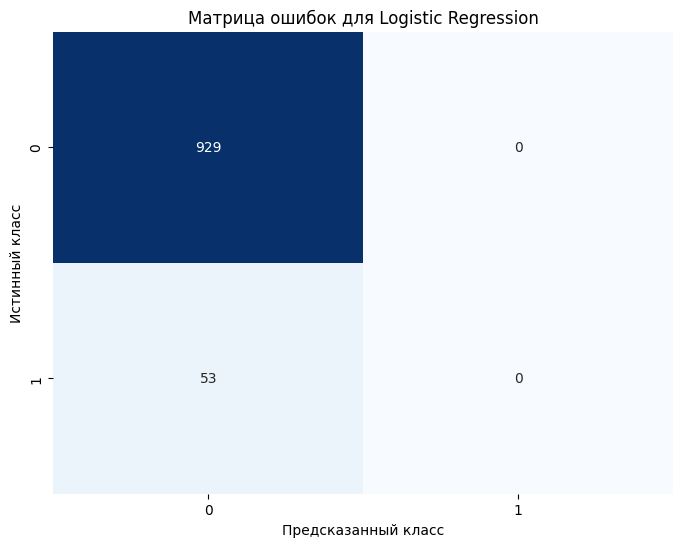

Отчет по классификации:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982


Модель: Random Forest
Точность: 0.9460
ROC AUC: 0.7819


c:\TEMP_UNIVERSITY\mai\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\TEMP_UNIVERSITY\mai\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\TEMP_UNIVERSITY\mai\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


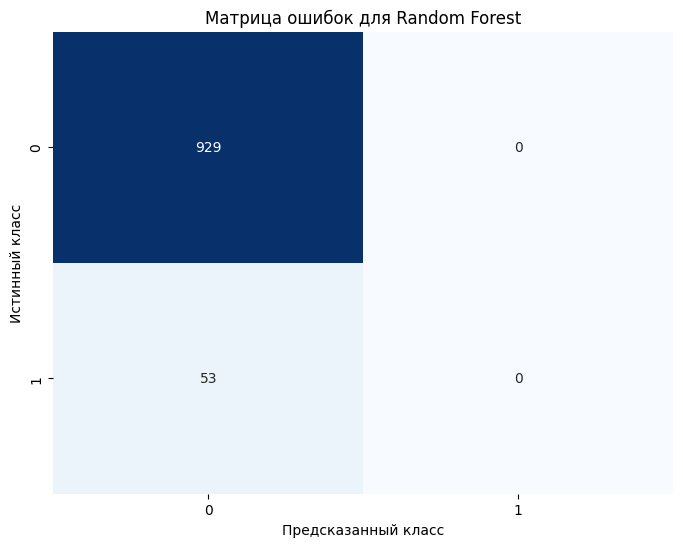

Отчет по классификации:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982


Модель: Gradient Boosting
Точность: 0.9399
ROC AUC: 0.8379


c:\TEMP_UNIVERSITY\mai\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\TEMP_UNIVERSITY\mai\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\TEMP_UNIVERSITY\mai\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


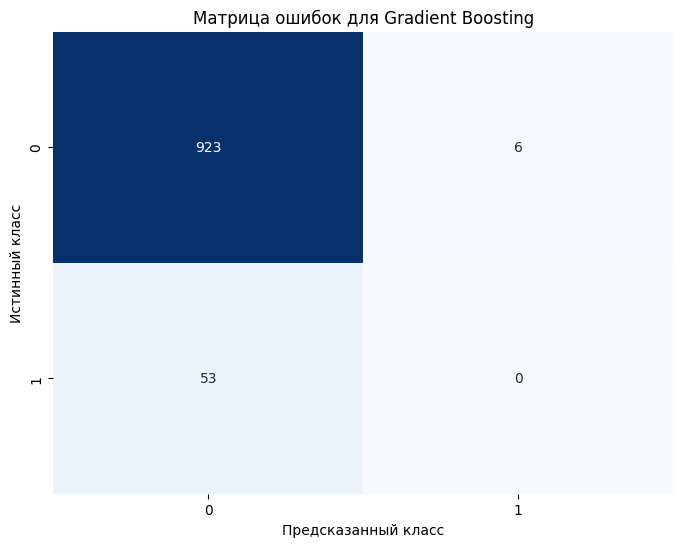

Отчет по классификации:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.94       982
   macro avg       0.47      0.50      0.48       982
weighted avg       0.89      0.94      0.92       982



In [13]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


# Функция для визуализации матрицы ошибок
def plot_confusion_matrix(conf_matrix, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Предсказанный класс")
    plt.ylabel("Истинный класс")
    plt.title(f"Матрица ошибок для {model_name}")
    plt.show()


# Инициализация моделей
log_reg = LogisticRegression(random_state=42, max_iter=1000)
rf_clf = RandomForestClassifier(random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)

# Словарь моделей для перебора
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf_clf,
    "Gradient Boosting": gb_clf,
}

# Словарь для хранения результатов
results = {}

# Обучение и оценка моделей
for name, model in models.items():
    model.fit(X_train, y_train)  # Обучаем модель
    y_pred = model.predict(X_test)  # Предсказываем на тестовой выборке
    accuracy = accuracy_score(y_test, y_pred)  # Точность
    auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])  # ROC AUC
    classification_rep = classification_report(
        y_test, y_pred, output_dict=True
    )  # Отчет по классификации
    conf_matrix = confusion_matrix(y_test, y_pred)  # Матрица ошибок

    # Сохраняем результаты
    results[name] = {
        "accuracy": accuracy,
        "auc": auc_score,
        "classification_report": classification_rep,
        "confusion_matrix": conf_matrix,
    }

# Вывод результатов
for name, metrics in results.items():
    print(f"\nМодель: {name}")
    print(f"Точность: {metrics['accuracy']:.4f}")
    print(f"ROC AUC: {metrics['auc']:.4f}")
    plot_confusion_matrix(metrics["confusion_matrix"], name)
    print("Отчет по классификации:")
    print(classification_report(y_test, models[name].predict(X_test)))

    import seaborn as sns

Оценка моделей. Матрица ошибок и ROC


Оценка модели: Logistic Regression
Точность (Accuracy): 0.9460
Точность (Precision): 0.0000
Полнота (Recall): 0.0000
F1-Score: 0.0000
AUC: 0.8518


c:\TEMP_UNIVERSITY\mai\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\TEMP_UNIVERSITY\mai\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


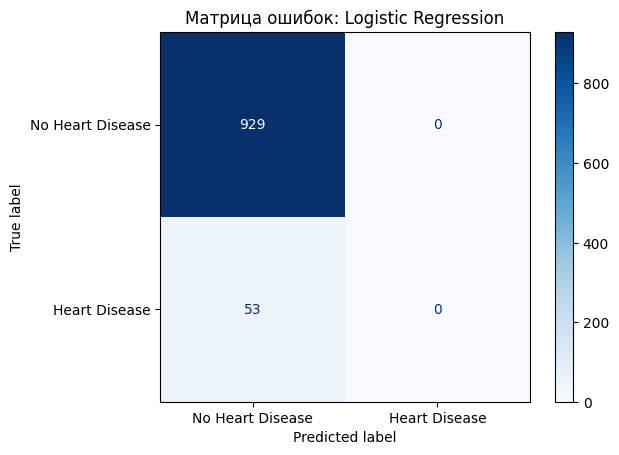

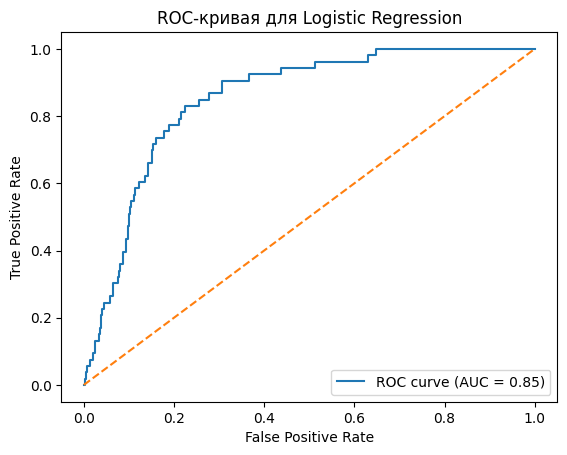


Оценка модели: Random Forest
Точность (Accuracy): 0.9460
Точность (Precision): 0.0000
Полнота (Recall): 0.0000
F1-Score: 0.0000
AUC: 0.7819


c:\TEMP_UNIVERSITY\mai\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


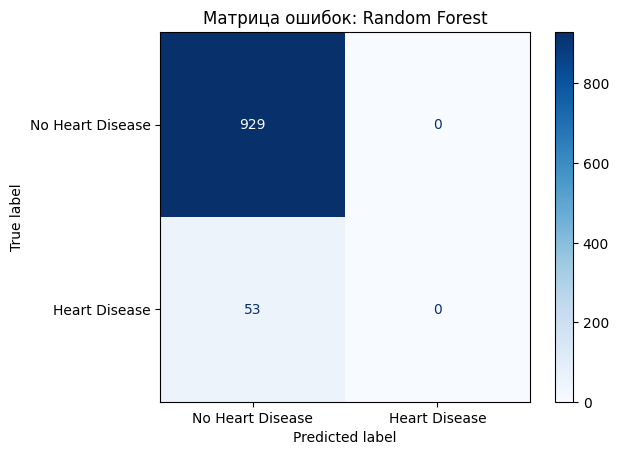

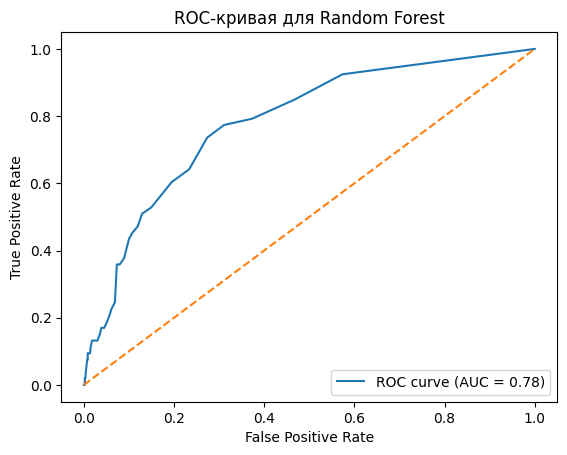


Оценка модели: Gradient Boosting
Точность (Accuracy): 0.9399
Точность (Precision): 0.0000
Полнота (Recall): 0.0000
F1-Score: 0.0000
AUC: 0.8379


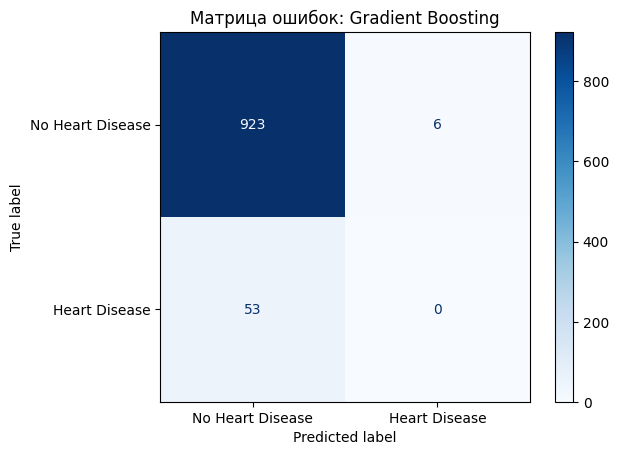

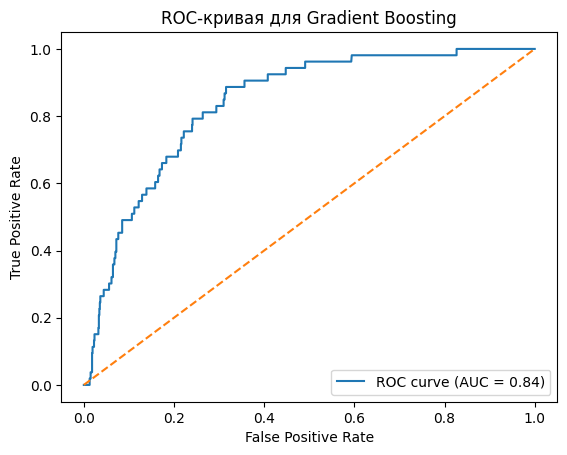

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

# Перебор всех моделей и вывод результатов
for name, model in models.items():
    print(f"\nОценка модели: {name}")

    # Обучаем модель
    model.fit(X_train, y_train)

    # Предсказания
    y_pred = model.predict(X_test)

    # Метрики
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    print(f"Точность (Accuracy): {accuracy:.4f}")
    print(f"Точность (Precision): {precision:.4f}")
    print(f"Полнота (Recall): {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC: {roc_auc:.4f}")

    # Матрица ошибок
    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=conf_matrix,
        display_labels=["No Heart Disease", "Heart Disease"],
    )
    disp.plot(cmap="Blues")
    plt.title(f"Матрица ошибок: {name}")
    plt.show()

    # ROC-кривая
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC-кривая для {name}")
    plt.legend(loc="lower right")
    plt.show()

Настройки гипермараметров

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Параметры для настройки RandomForest
param_grid_rf = {
    "n_estimators": [100, 200, 300, 500],  # Увеличено количество деревьев
    "max_depth": [10, 20, 30, 50, None],  # Больше вариантов глубины
    "min_samples_split": [2, 5, 10, 15],  # Более широкий диапазон
    "min_samples_leaf": [1, 2, 4, 6],  # Увеличено минимальное число в листе
    "max_features": ["sqrt", "log2", None],  # Добавлена настройка признаков для деления
}

grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=5,  # Кросс-валидация с 5 фолдами
    scoring="roc_auc",  # Оценка по метрике AUC
    n_jobs=-1,
    verbose=2,  # Вывод прогресса
)

grid_search_rf.fit(X_train, y_train)

# Лучшие параметры и результаты
print("Лучшие параметры для RandomForest:", grid_search_rf.best_params_)
best_rf_model = grid_search_rf.best_estimator_

y_pred_rf = best_rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])

print(f"Точность RandomForest: {accuracy_rf:.4f}")
print(f"AUC RandomForest: {roc_auc_rf:.4f}")

Fitting 5 folds for each of 960 candidates, totalling 4800 fits
Лучшие параметры для RandomForest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 300}
Точность RandomForest: 0.9460
AUC RandomForest: 0.8348


Логическая регрессия

In [16]:
# Параметры для настройки LogisticRegression
param_grid_lr = {
    "C": [
        0.01,
        0.1,
        1,
        5,
        10,
    ],  # Регуляризационный параметр, добавлено больше вариантов
    "solver": ["liblinear", "saga"],  # Алгоритм оптимизации
    "max_iter": [100, 200, 300],  # Максимальное количество итераций
    "penalty": ["l2", "elasticnet"],  # Добавлена настройка для типа регуляризации
}

# GridSearchCV для LogisticRegression
grid_search_lr = GridSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_grid=param_grid_lr,
    cv=5,  # Увеличена кросс-валидация до 5 фолдов
    scoring="roc_auc",  # Используется AUC вместо accuracy для более точной оценки
    n_jobs=-1,
    verbose=2,  # Вывод прогресса выполнения
)

grid_search_lr.fit(X_train, y_train)

# Лучшие параметры для LogisticRegression
print("Лучшие параметры для LogisticRegression:", grid_search_lr.best_params_)

# Обучение модели с лучшими параметрами
best_lr_model = grid_search_lr.best_estimator_

# Оценка лучшей модели
y_pred_lr = best_lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, best_lr_model.predict_proba(X_test)[:, 1])

print(f"Точность LogisticRegression: {accuracy_lr:.4f}")
print(f"AUC LogisticRegression: {roc_auc_lr:.4f}")

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Лучшие параметры для LogisticRegression: {'C': 5, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Точность LogisticRegression: 0.9460
AUC LogisticRegression: 0.5230


c:\TEMP_UNIVERSITY\mai\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "c:\TEMP_UNIVERSITY\mai\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\TEMP_UNIVERSITY\mai\.venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\TEMP_UNIVERSITY\mai\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in 

In [17]:
# Параметры для настройки GradientBoosting
param_grid_gb = {
    "n_estimators": [100, 200, 300],  # Количество деревьев
    "learning_rate": [0.01, 0.05, 0.1],  # Скорость обучения
    "max_depth": [3, 5, 7],  # Глубина деревьев
    "subsample": [0.8, 0.9, 1.0],  # Доля выборки для обучения
    "min_samples_split": [2, 5],  # Минимальное количество образцов для разделения узла
}

# GridSearchCV для GradientBoosting
grid_search_gb = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid_gb,
    cv=5,  # Увеличена кросс-валидация до 5 фолдов
    scoring="roc_auc",  # Используется AUC вместо accuracy для более точной оценки
    n_jobs=-1,
    verbose=2,  # Вывод прогресса выполнения
)

grid_search_gb.fit(X_train, y_train)

# Лучшие параметры для GradientBoosting
print("Лучшие параметры для GradientBoosting:", grid_search_gb.best_params_)

# Обучение модели с лучшими параметрами
best_gb_model = grid_search_gb.best_estimator_

# Оценка лучшей модели
y_pred_gb = best_gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, best_gb_model.predict_proba(X_test)[:, 1])

print(f"Точность GradientBoosting: {accuracy_gb:.4f}")
print(f"AUC GradientBoosting: {roc_auc_gb:.4f}")

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Лучшие параметры для GradientBoosting: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 0.8}
Точность GradientBoosting: 0.9460
AUC GradientBoosting: 0.8416


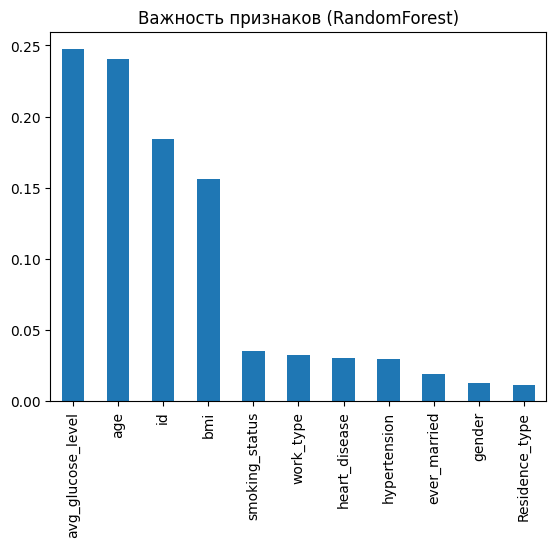

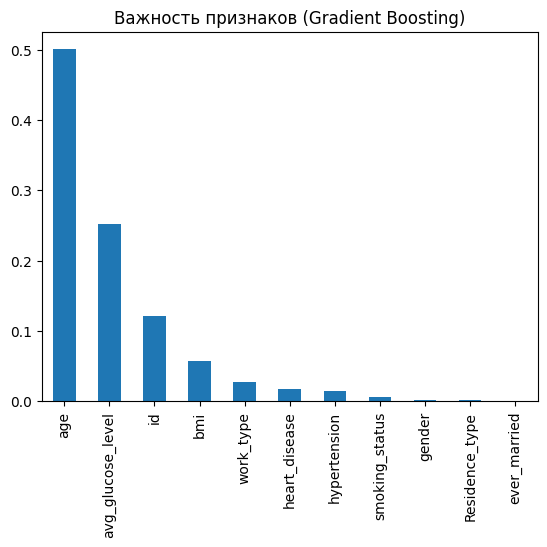

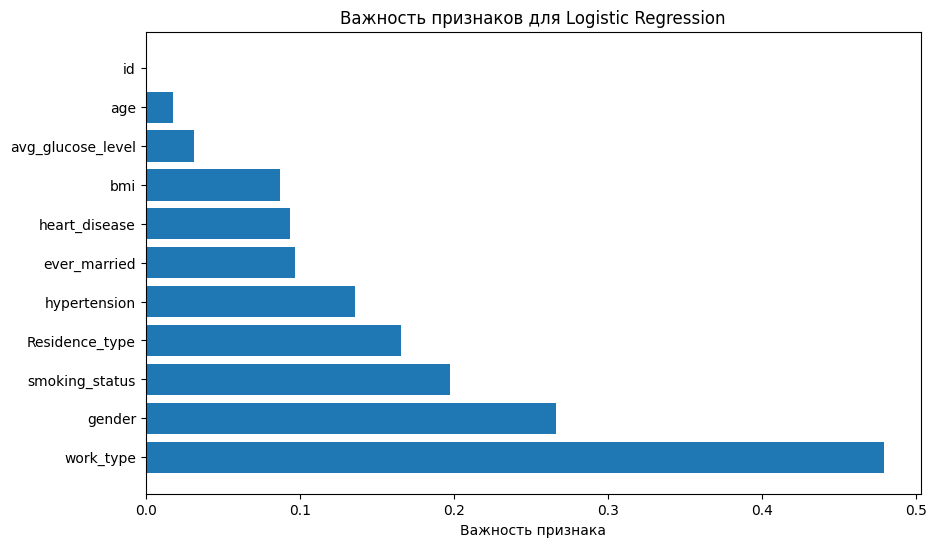

In [24]:
import pandas as pd

feature_importances = pd.Series(
    best_rf_model.feature_importances_, index=X_train.columns
)
feature_importances.sort_values(ascending=False).plot(kind="bar")
plt.title("Важность признаков (RandomForest)")
plt.show()

feature_importances = pd.Series(
    best_gb_model.feature_importances_, index=X_train.columns
)
feature_importances.sort_values(ascending=False).plot(kind="bar")
plt.title("Важность признаков (Gradient Boosting)")
plt.show()


# Извлечение коэффициентов модели
coefficients = best_lr_model.coef_[0]

# Получение имен признаков
feature_names = X_train.columns  # если X_train это DataFrame

# Сортировка признаков по важности (по абсолютным значениям коэффициентов)
importance = np.abs(coefficients)
sorted_idx = np.argsort(importance)[::-1]  # Индексы сортировки по убыванию

# Построение графика
plt.figure(figsize=(10, 6))
plt.barh(range(len(importance)), importance[sorted_idx], align="center")
plt.yticks(range(len(importance)), np.array(feature_names)[sorted_idx])
plt.xlabel("Важность признака")
plt.title("Важность признаков для Logistic Regression")
plt.show()

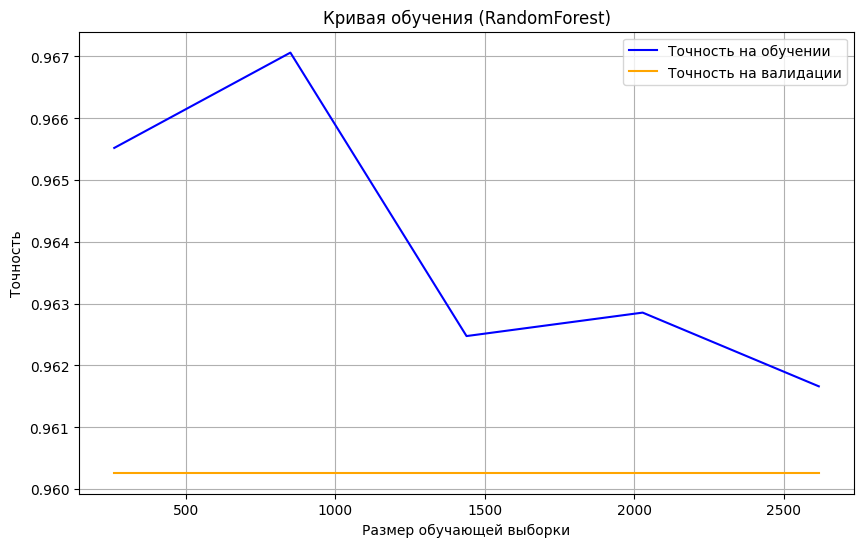

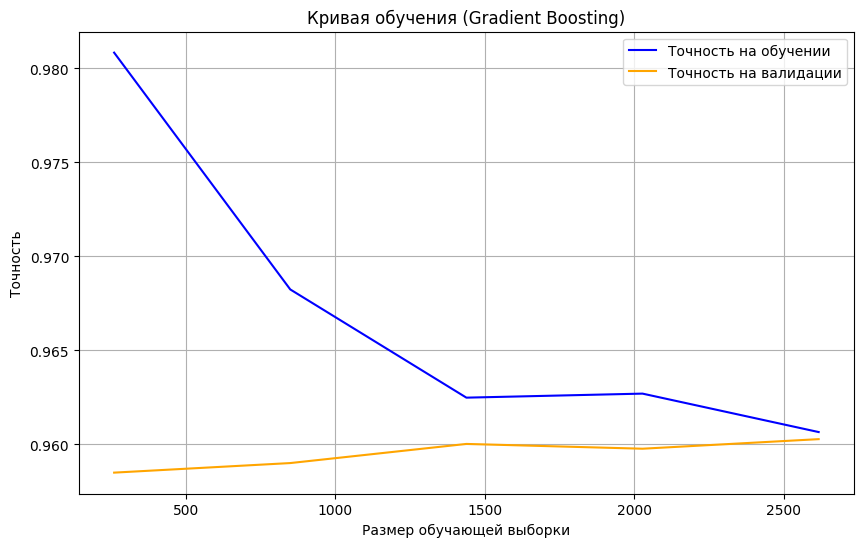

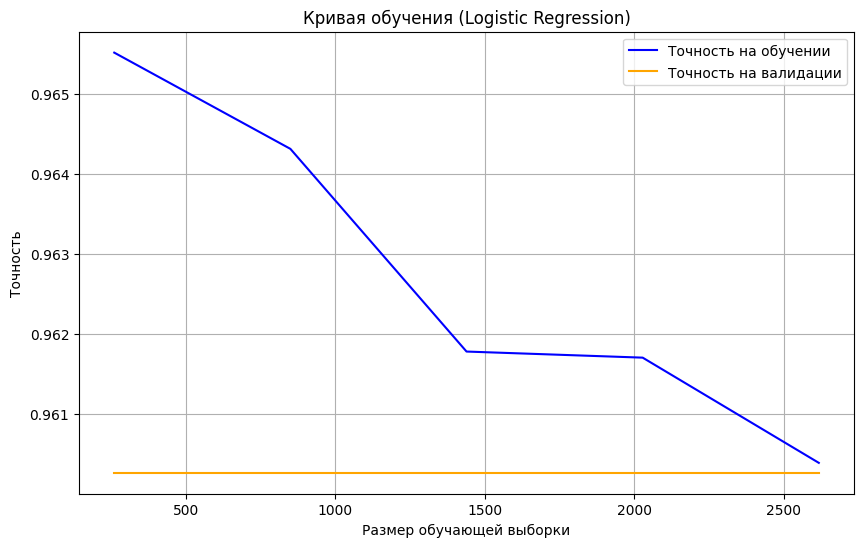

In [26]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_rf_model, X_train, y_train, cv=3, scoring="accuracy", n_jobs=-1
)

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Точность на обучении", color="blue")
plt.plot(train_sizes, test_scores_mean, label="Точность на валидации", color="orange")
plt.xlabel("Размер обучающей выборки")
plt.ylabel("Точность")
plt.title("Кривая обучения (RandomForest)")
plt.legend()
plt.grid()
plt.show()


train_sizes, train_scores, test_scores = learning_curve(
    best_gb_model, X_train, y_train, cv=3, scoring="accuracy", n_jobs=-1
)

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Точность на обучении", color="blue")
plt.plot(train_sizes, test_scores_mean, label="Точность на валидации", color="orange")
plt.xlabel("Размер обучающей выборки")
plt.ylabel("Точность")
plt.title("Кривая обучения (Gradient Boosting)")
plt.legend()
plt.grid()
plt.show()


train_sizes, train_scores, test_scores = learning_curve(
    best_lr_model, X_train, y_train, cv=3, scoring="accuracy", n_jobs=-1
)

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Точность на обучении", color="blue")
plt.plot(train_sizes, test_scores_mean, label="Точность на валидации", color="orange")
plt.xlabel("Размер обучающей выборки")
plt.ylabel("Точность")
plt.title("Кривая обучения (Logistic Regression)")
plt.legend()
plt.grid()
plt.show()

c:\TEMP_UNIVERSITY\mai\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


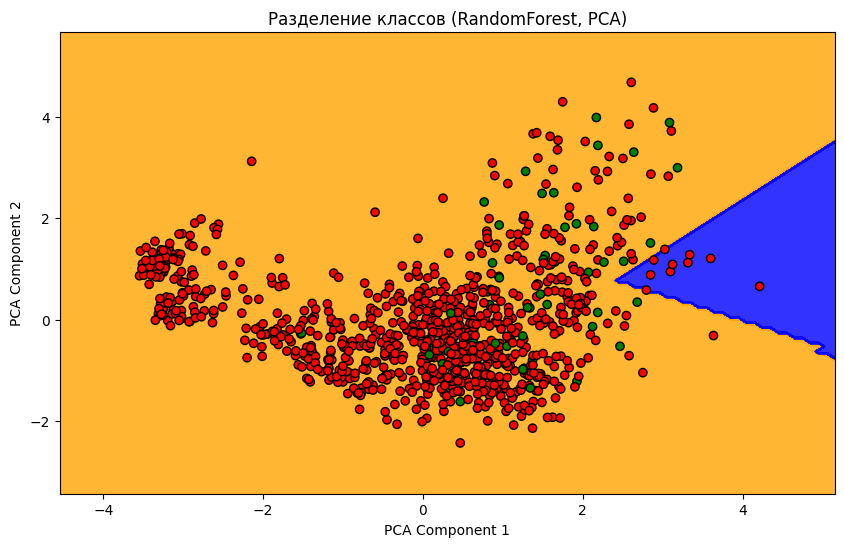

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Применяем PCA для снижения размерности до 2D
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_test)  # Масштабируем данные
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Устанавливаем диапазон для сетки
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Создаем новые данные на основе сетки для предсказаний
grid_points = pca.inverse_transform(
    np.c_[xx.ravel(), yy.ravel()]
)  # Возвращаем в исходное пространство
Z = best_rf_model.predict(grid_points)
Z = Z.reshape(xx.shape)

# Визуализация
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(("orange", "blue")))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=y_test,
    edgecolor="k",
    cmap=ListedColormap(("red", "green")),
)
plt.title("Разделение классов (RandomForest, PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()